In [2]:
from perceval.components import BS, PERM, Port, PS
from perceval.utils import Encoding
import perceval as pcvl
import numpy as np
from perceval.algorithm import Analyzer
from perceval.algorithm import Sampler  # import the Sampler class
from perceval import catalog

In [3]:
# KLM CZ 1/16

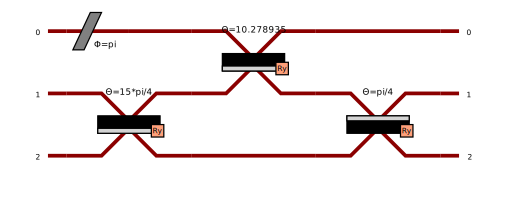

In [4]:
U = np.array([[ 1-np.sqrt(2),              2**-0.25,             (3/np.sqrt(2) - 2)**0.5],
              [ 2**-0.25,                   0.5,                        0.5-np.sqrt(0.5)],
              [ (3/np.sqrt(2) - 2)**0.5,     0.5-np.sqrt(0.5),          np.sqrt(2)-0.5]])
NS = pcvl.Circuit.decomposition(U, BS.Ry(theta=pcvl.P('theta'), phi_tr=0), phase_shifter_fn=PS, inverse_v=True)

pcvl.pdisplay(NS)
#pcvl.pdisplay(NS_1.U)

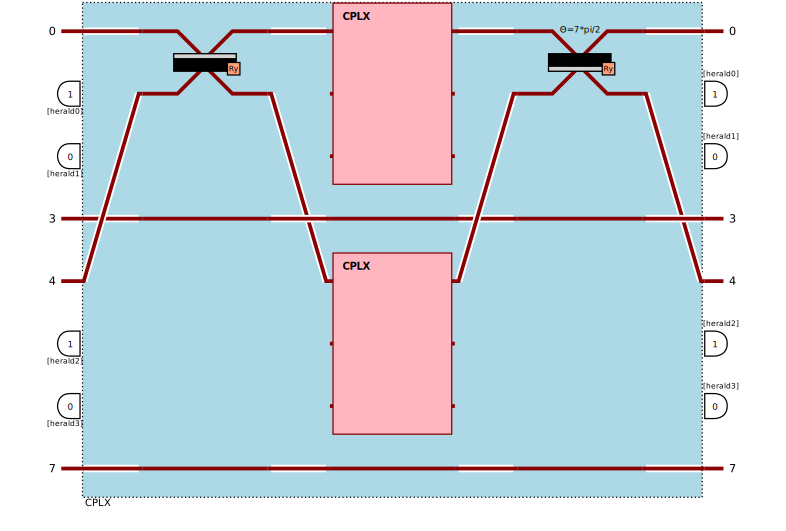

In [5]:
KLM_CZ = (pcvl.Circuit(8)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7]))
              .add(0, BS.Ry(np.pi/2), merge=False)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7]))
              .add(0, NS, merge=False)
              .add(4, NS, merge=False)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7]))
              .add(0, BS.Ry(-np.pi/2), merge=False)
              .add(0, PERM([0, 4, 2, 3, 1, 5, 6, 7])))
KLM_CZ_P = pcvl.Processor("SLOS", KLM_CZ)
KLM_CZ_P.add_herald(1, 1)\
            .add_herald(2, 0)\
            .add_herald(5, 1)\
            .add_herald(6, 0)
pcvl.pdisplay(KLM_CZ_P, recursive=True)

In [6]:
KLM_CX = pcvl.Processor("SLOS",4)
KLM_CX.add(2,BS.H())
KLM_CX.add(0, KLM_CZ_P)
KLM_CX.add(2,BS.H())

state_00 = pcvl.BasicState([0, 1, 0, 1])
state_01 = pcvl.BasicState([0, 1, 1, 0])
state_10 = pcvl.BasicState([1, 0, 0, 1])
state_11 = pcvl.BasicState([1, 0, 1, 0])
analyser_cz = Analyzer(KLM_CX, [state_00,state_01,state_10,state_11] ,[state_00, state_01, state_10, state_11]) #0,1,0,1,1,0,1,0

#pcvl.pdisplay(pcvl.catalog["klm cnot"].build_circuit().U)

pcvl.pdisplay(analyser_cz)

,"|0,1,0,1>","|0,1,1,0>","|1,0,0,1>","|1,0,1,0>"
"|0,1,0,1>",1,0,0,0
"|0,1,1,0>",0,1,0,0
"|1,0,0,1>",0,0,0,1
"|1,0,1,0>",0,0,1,0


In [7]:
pcvl.pdisplay(KLM_CX.linear_circuit().U)

<IPython.core.display.Math object>

In [8]:
# KNIL, H - Heralded CZ - H    2/27

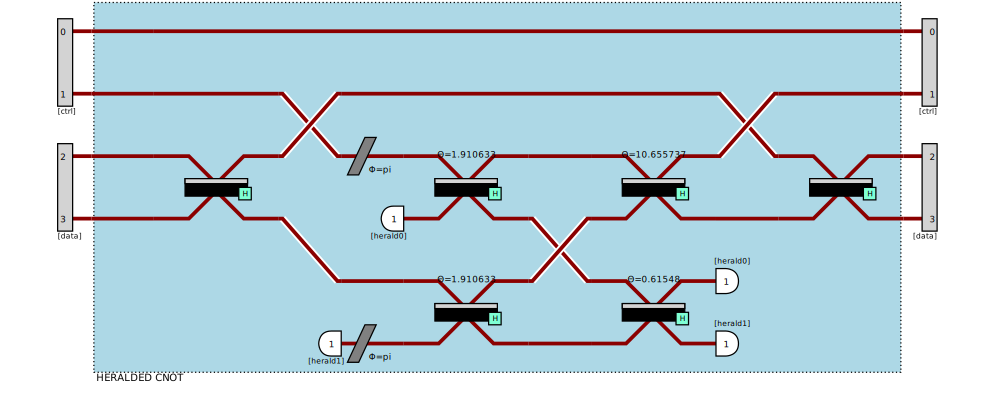

In [9]:
H_CNOT = pcvl.catalog['heralded cnot'].build_processor()

pcvl.pdisplay(H_CNOT,recursive=True)

In [10]:
# KNIL, Heralded CZ    2/27

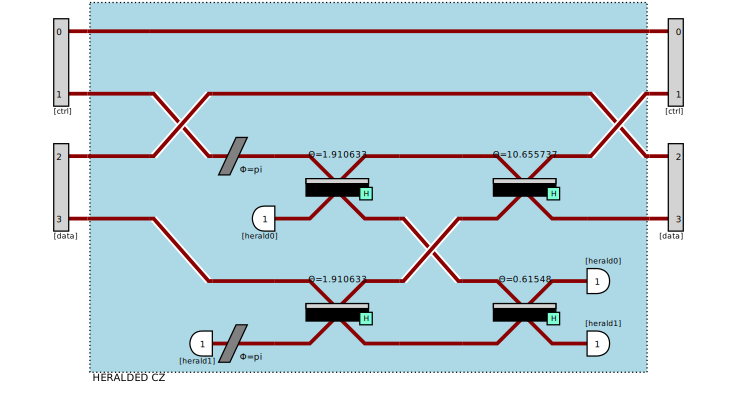

In [11]:
H_CZ = pcvl.catalog['heralded cz'].build_processor()

pcvl.pdisplay(H_CZ,recursive=True)

In [12]:
# Ralph CNOT 1/9

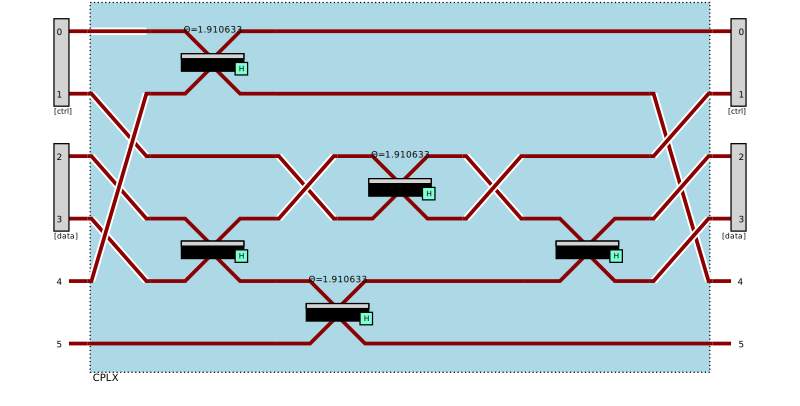

In [13]:
theta_13 = BS.r_to_theta(1 / 3)
Ralph_CNOT = (pcvl.Circuit(6)
         .add(0, PERM([0, 2, 3, 4, 1]))
         .add((0, 1), BS.H(theta_13))
         .add((3, 4), BS.H())
         .add((2, 3), PERM([1, 0]))
         .add((2, 3), BS.H(theta_13))
         .add((2, 3), PERM([1, 0]))
         .add((4, 5), BS.H(theta_13))
         .add((3, 4), BS.H())
         .add(1, PERM([3, 0, 1, 2])))


processor_cnot = pcvl.Processor("SLOS", Ralph_CNOT)
processor_cnot.add_port(0, Port(Encoding.DUAL_RAIL, 'ctrl')) \
              .add_port(2, Port(Encoding.DUAL_RAIL, 'data')) \
              #.add_herald(4, 0) \
              #.add_herald(5, 0)

pcvl.pdisplay(processor_cnot, recursive=True)

In [14]:
# H_CZ with TP1  1/4

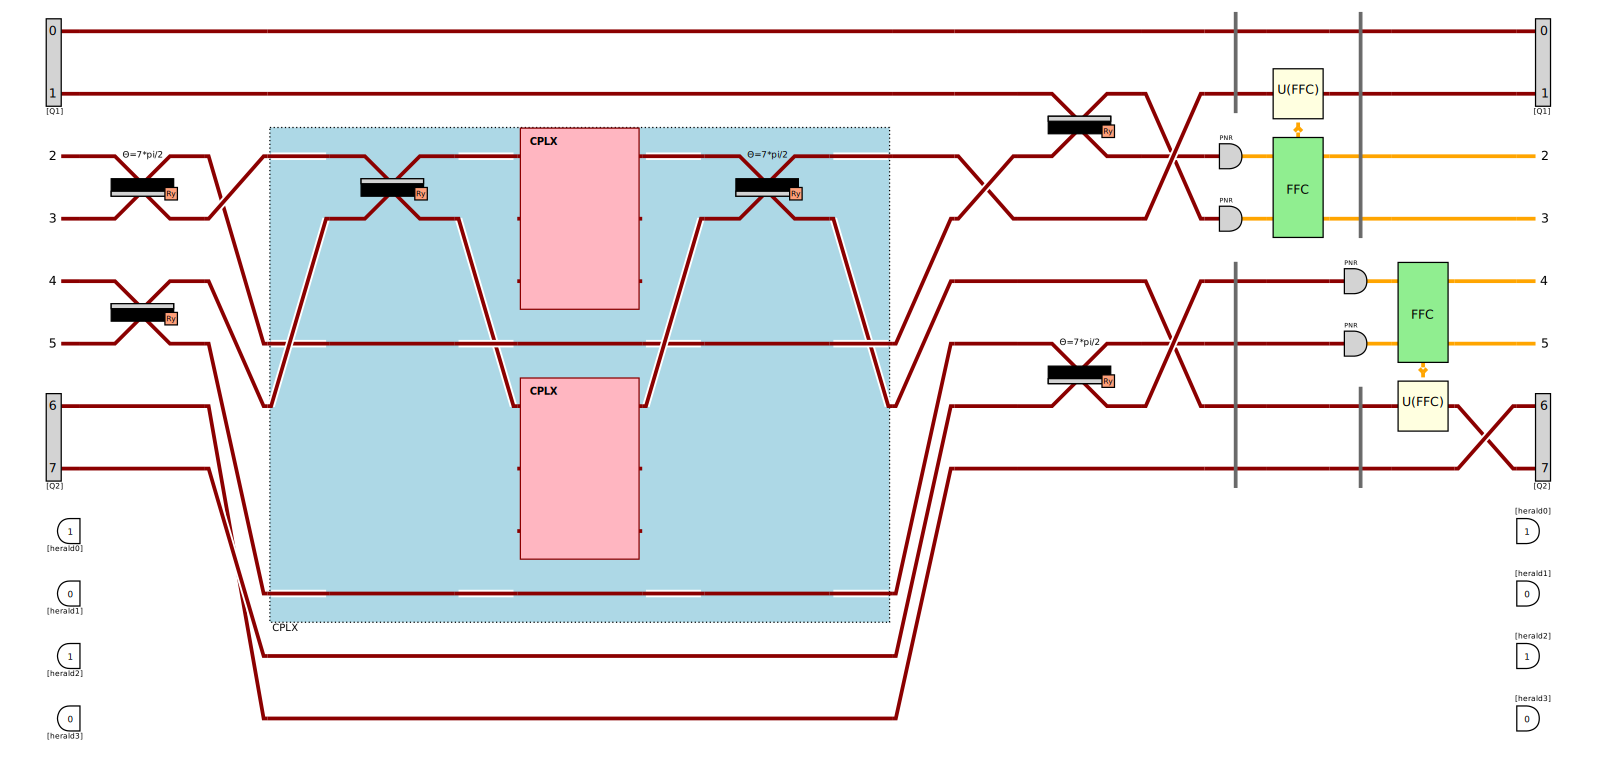

In [ ]:
Theta_45 = np.pi/2
CZ_TP1 = (pcvl.Processor("SLOS", 8)
            .add_port(0, Port(Encoding.DUAL_RAIL, 'Q1')) \
            .add_port(6, Port(Encoding.DUAL_RAIL, 'Q2')) \
            .add((2, 3), BS.Ry(-Theta_45)) \
            .add((4, 5), BS.Ry(Theta_45)) \
            .add(0, PERM([0, 1, 3, 2, 4, 5, 7, 6])) \
            .add(2, KLM_CZ_P) \
            .add(0, PERM([0, 1, 3, 2, 4, 5, 6, 7])) \
            .add((1, 2), BS.Ry(Theta_45)) \
            .add((5, 6), BS.Ry(-Theta_45))) \
            .add((1,2,3), PERM([2,1,0])) \
            .add((4,5,6), PERM([2,1,0]))



ff_z1 = pcvl.FFCircuitProvider(2,0,pcvl.Circuit(1))
ff_z1.add_configuration([1,0], PS(np.pi))

ff_z2 = pcvl.FFCircuitProvider(2,-1,pcvl.Circuit(1))
ff_z2.add_configuration([0,1], PS(np.pi))

CZ_TP1.add(2,pcvl.Detector.pnr())
CZ_TP1.add(3,pcvl.Detector.pnr())
CZ_TP1.add(4,pcvl.Detector.pnr())
CZ_TP1.add(5,pcvl.Detector.pnr())

CZ_TP1.add(2,ff_z2)
CZ_TP1.add(4,ff_z1)

CZ_TP1.add((6,7),PERM([1,0]))

CZ_TP1.add(0,pcvl.Source)
#CZ_TP1.add(0, PERM([0,3,2,1,6,4,5,7]))

pcvl.pdisplay(CZ_TP1, recursive=True)

In [16]:
analyser = Analyzer(CZ_TP1, [pcvl.BasicState([0, 1, 0,1, 1, 0, 0, 1])] ,"*")
pcvl.pdisplay(analyser)

,"|1,0,0,0,1,0,0,2>","|0,0,0,0,0,1,2,1>","|1,1,1,0,1,0,0,0>","|0,0,1,1,0,0,2,0>","|2,1,0,0,0,0,0,1>","|0,1,1,0,0,2,0,0>","|0,0,0,2,0,1,1,0>","|1,2,1,0,0,0,0,0>","|0,3,0,0,0,0,1,0>","|0,0,1,0,0,1,1,1>","|0,2,0,1,0,0,0,1>","|1,0,0,2,1,0,0,0>","|0,2,0,0,1,0,0,1>","|0,0,1,0,2,0,1,0>","|0,2,1,0,1,0,0,0>","|1,0,0,0,0,0,1,2>","|0,0,0,3,0,1,0,0>","|0,0,0,0,1,1,0,2>","|2,0,0,1,0,1,0,0>","|1,0,1,0,2,0,0,0>","|0,0,1,0,1,2,0,0>","|0,0,0,0,1,0,3,0>","|2,0,0,0,0,1,0,1>","|1,1,0,0,0,0,0,2>","|4,0,0,0,0,0,0,0>","|0,0,1,0,0,2,1,0>","|2,0,1,1,0,0,0,0>","|0,1,0,2,0,0,0,1>","|0,0,1,3,0,0,0,0>","|1,2,0,1,0,0,0,0>","|3,0,0,0,0,0,0,1>","|0,0,0,2,2,0,0,0>","|0,0,1,0,3,0,0,0>","|0,0,1,0,1,0,0,2>","|1,0,0,0,2,1,0,0>","|0,0,0,1,2,0,0,1>","|1,0,1,1,0,0,0,1>","|1,0,1,1,1,0,0,0>","|0,0,0,0,0,0,0,4>","|0,0,0,2,0,2,0,0>","|0,1,0,1,1,1,0,0>","|0,0,2,0,0,1,0,1>","|0,0,0,0,2,0,2,0>","|1,1,1,0,0,0,1,0>","|0,1,0,1,0,0,1,1>","|0,1,3,0,0,0,0,0>","|0,3,1,0,0,0,0,0>","|0,1,2,0,0,0,0,1>","|2,0,0,0,0,0,2,0>","|0,2,0,0,0,0,2,0>","|1,0,2,1,0,0,0,0>","|0,0,1,2,0,0,0,1>","|0,0,0,2,0,0,0,2>","|0,0,0,2,0,0,1,1>","|1,1,2,0,0,0,0,0>","|1,0,0,2,0,1,0,0>","|1,0,1,1,0,0,1,0>","|2,1,1,0,0,0,0,0>","|0,0,0,0,0,0,2,2>","|0,0,1,0,0,1,2,0>","|2,1,0,0,0,0,1,0>","|0,1,1,0,0,1,1,0>","|0,0,2,0,0,1,1,0>","|1,0,0,0,0,1,0,2>","|0,0,0,1,0,0,3,0>","|0,0,0,0,0,1,3,0>","|1,0,0,1,1,0,1,0>","|2,0,0,0,1,1,0,0>","|0,1,1,0,2,0,0,0>","|0,0,0,1,0,2,0,1>","|0,1,1,0,0,1,0,1>","|1,0,2,0,0,0,0,1>","|0,2,0,0,0,2,0,0>","|3,0,1,0,0,0,0,0>","|2,0,1,0,1,0,0,0>","|0,3,0,0,0,1,0,0>","|0,4,0,0,0,0,0,0>","|1,0,0,0,0,2,0,1>","|0,0,0,0,2,2,0,0>","|0,0,1,1,0,1,0,1>","|1,1,0,0,1,0,0,1>","|0,0,2,0,0,0,2,0>","|0,2,0,2,0,0,0,0>","|0,0,1,1,2,0,0,0>","|0,1,0,1,1,0,1,0>","|0,0,0,0,2,0,1,1>","|0,0,3,1,0,0,0,0>","|0,0,0,2,1,0,0,1>","|0,0,0,1,0,1,2,0>","|0,0,0,2,1,0,1,0>","|1,0,1,2,0,0,0,0>","|0,1,0,0,0,1,2,0>","|0,1,2,0,1,0,0,0>","|0,1,0,0,0,1,1,1>","|1,0,0,1,1,0,0,1>","|1,0,1,0,1,1,0,0>","|0,0,1,0,0,0,2,1>","|0,0,1,0,0,0,0,3>","|0,0,0,0,4,0,0,0>","|2,0,1,0,0,1,0,0>","|2,0,0,0,1,0,0,1>","|0,1,1,1,0,0,1,0>","|0,0,2,1,1,0,0,0>","|0,0,1,1,0,1,1,0>","|2,0,0,1,1,0,0,0>","|0,0,2,0,1,0,1,0>","|0,0,1,2,0,0,1,0>","|0,0,1,0,2,0,0,1>","|0,1,0,1,0,1,1,0>","|0,0,0,3,0,0,1,0>","|0,1,1,0,0,0,2,0>","|0,0,1,0,1,1,1,0>","|2,1,0,1,0,0,0,0>","|1,0,0,3,0,0,0,0>","|0,0,0,0,1,2,0,1>","|0,0,2,1,0,0,1,0>","|0,0,0,3,1,0,0,0>","|0,0,0,0,0,2,1,1>","|0,0,1,2,0,1,0,0>","|2,0,0,0,0,0,0,2>","|0,1,0,1,0,0,0,2>","|0,0,2,1,0,0,0,1>","|0,0,0,1,2,0,1,0>","|1,1,0,0,1,1,0,0>","|0,1,0,1,2,0,0,0>","|0,1,0,0,2,1,0,0>","|1,1,0,0,0,1,0,1>","|1,0,0,0,0,1,1,1>","|0,0,0,1,3,0,0,0>","|2,0,0,1,0,0,0,1>","|1,1,0,1,0,0,1,0>","|2,0,0,0,1,0,1,0>","|0,0,0,1,1,1,1,0>","|0,0,0,0,2,1,1,0>","|0,0,0,0,2,1,0,1>","|0,1,0,0,0,0,2,1>","|0,0,1,1,0,0,0,2>","|0,1,1,1,0,1,0,0>","|0,0,0,1,1,1,0,1>","|0,0,3,0,0,1,0,0>","|1,1,0,0,0,0,2,0>","|0,2,0,1,1,0,0,0>","|1,0,0,1,0,0,1,1>","|1,0,2,0,0,1,0,0>","|0,1,0,0,3,0,0,0>","|0,1,0,0,1,0,0,2>","|0,0,0,0,2,0,0,2>","|1,1,0,0,0,2,0,0>","|2,1,0,0,1,0,0,0>","|0,0,0,0,3,0,1,0>","|0,1,2,0,0,1,0,0>","|0,0,1,0,0,2,0,1>","|2,0,0,2,0,0,0,0>","|0,2,0,0,1,0,1,0>","|0,0,2,0,1,0,0,1>","|0,1,0,0,0,3,0,0>","|0,0,1,0,0,1,0,2>","|0,0,0,0,3,1,0,0>","|0,0,0,0,0,2,0,2>","|0,1,1,1,0,0,0,1>","|1,2,0,0,0,0,1,0>","|0,0,0,1,1,2,0,0>","|0,1,1,0,1,1,0,0>","|1,0,1,0,0,1,0,1>","|1,1,0,1,1,0,0,0>","|0,0,1,1,1,0,0,1>","|0,1,0,1,0,0,2,0>","|1,0,0,0,1,1,1,0>","|1,0,0,0,0,0,0,3>","|0,2,0,0,0,1,0,1>","|0,1,0,1,1,0,0,1>","|0,0,1,0,0,3,0,0>","|2,0,0,1,0,0,1,0>","|1,0,0,0,2,0,0,1>","|0,1,0,0,2,0,1,0>","|0,0,0,0,0,0,1,3>","|1,0,3,0,0,0,0,0>","|0,0,0,1,0,3,0,0>","|1,0,1,0,0,0,1,1>","|0,0,1,0,1,1,0,1>","|0,1,1,1,1,0,0,0>","|1,0,1,0,0,2,0,0>","|1,0,0,1,0,1,0,1>","|1,0,0,0,2,0,1,0>","|0,0,0,1,2,1,0,0>","|1,1,0,0,2,0,0,0>","|0,1,0,0,0,0,3,0>","|2,1,0,0,0,1,0,0>","|3,0,0,0,0,1,0,0>","|0,1,0,0,0,1,0,2>","|0,0,1,0,1,0,1,1>","|0,0,0,3,0,0,0,1>","|0,0,2,0,0,0,1,1>","|0,0,0,2,0,0,2,0>","|2,0,2,0,0,0,0,0>","|0,2,1,0,0,0,1,0>","|0,1,0,1,0,2,0,0>","|0,1,0,0,1,2,0,0>","|1,0,0,1,2,0,0,0>","|0,0,1,0,0,0,3,0>"

In [17]:
CX_TP1 = pcvl.Processor("SLOS", 8)
CX_TP1.add(6, BS.H())
CX_TP1.add(0, CZ_TP1)
CX_TP1.add(6, BS.H())

def fock_states(n, m):
    """Return a list of lists corresponding to all Fock states with
    n photons in m modes, ordered in descending lexicographic order."""
    if m == 1:
        return [[n]]
    states = []
    # Iterate i from n down to 0 to ensure descending order in the first mode
    for i in range(n, -1, -1):
        for tail in fock_states(n - i, m - 1):
            states.append([i] + tail)
    return states

states = fock_states(2,4)

out_states = [pcvl.BasicState([0,1] + state + [1, 0]) for state in states]


analyser = Analyzer(CX_TP1, [pcvl.BasicState([0, 1, 0,1, 1, 0, 0, 1])] , out_states)
pcvl.pdisplay(analyser)

,"|0,1,2,0,0,0,1,0>","|0,1,1,1,0,0,1,0>","|0,1,1,0,1,0,1,0>","|0,1,1,0,0,1,1,0>","|0,1,0,2,0,0,1,0>","|0,1,0,1,1,0,1,0>","|0,1,0,1,0,1,1,0>","|0,1,0,0,2,0,1,0>","|0,1,0,0,1,1,1,0>","|0,1,0,0,0,2,1,0>"
"|0,1,0,1,1,0,0,1>",0,0,1/16,1/16,0,1/16,1/16,0,0,0


In [18]:
    # H_CZ with TP1  1/4

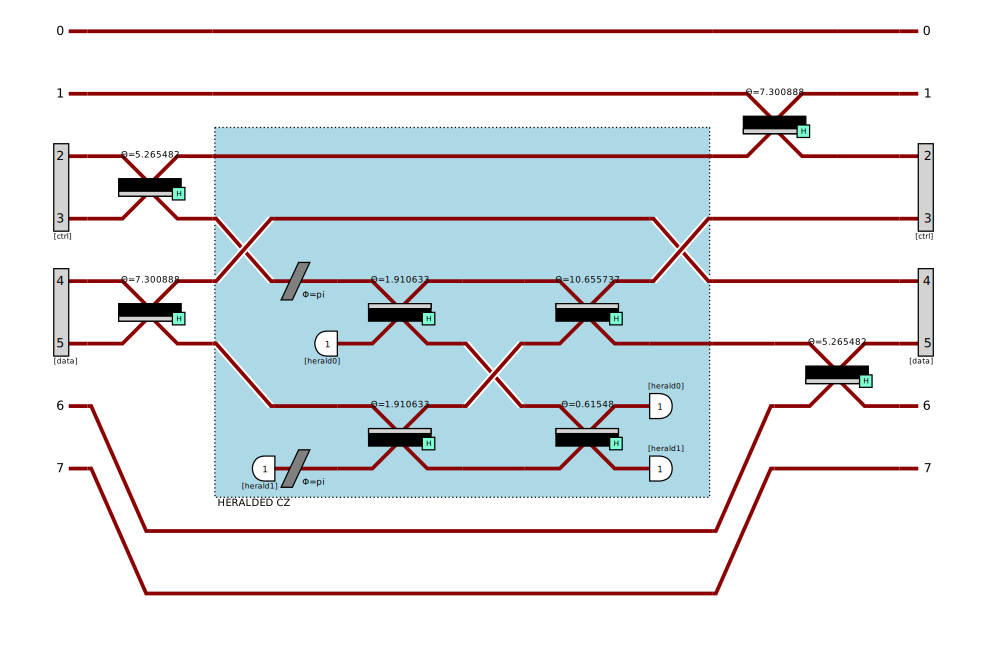

In [19]:
CNOT_TP1 = (pcvl.Processor("SLOS", 8)
            .add((2, 3), BS.H(-45))
            .add((4, 5), BS.H(45))
            #.add(0, PERM([0, 1, 3, 2, 4, 5, 6, 7]))
            .add(2, H_CZ)
            .add((1, 2), BS.H(45))
            .add((5, 6), BS.H(-45)))

pcvl.pdisplay(CNOT_TP1, recursive=True)